<a href="https://colab.research.google.com/github/rohailkhan/deep_learning/blob/master/Digits_data(subset)_call_backs_batch_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets
# Loading MNIST dataset.
# verify
# You can verify that the split between train and test is 60,000, and
#10,000 respectively.
# Labels have one-hot representation.is automatically applied
mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train is 60000 rows of 28x28 values; we --> reshape it to
# 60000 x 784.
X_train=X_train.reshape(60000,(28*28))
X_test=X_test.reshape(10000,(28*28))
from tensorflow.keras.utils import to_categorical
NB_CLASSES = 10 # number of outputs = number of digits
#One-hot representation of the labels.
y_train = to_categorical(y_train, NB_CLASSES)
y_test = to_categorical(y_test, NB_CLASSES)

In [0]:
X_train=X_train[0:1257,0:64]
y_train=y_train[0:1257,:]
X_test=X_test[0:540,0:64]
y_test=y_test[0:540,:]
print('Xtest={} y_test={} X_train={} y_train={}'.format(X_test.shape,y_test.shape,X_train.shape,y_train.shape))

Xtest=(540, 64) y_test=(540, 10) X_train=(1257, 64) y_train=(1257, 10)


In [0]:
model=Sequential()
# using 
model.add(Dense(16,input_shape=(64,),activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',  metrics=['accuracy'])

In [0]:
history=model.fit(X_train,y_train,epochs=60,validation_data=(X_test,y_test),verbose=0)

In [0]:
## check if the model is overfitting by plotting
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc,color='red')
    plt.plot(val_acc,color='green')
    plt.legend(['Train','Test'])
    plt.xlabel('EPOCH')
    plt.ylabel('Accuracy')
    plt.show()

In [0]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss,color='red')
    plt.plot(val_loss,color='green')
    plt.xlabel('EPOCHS')
    plt.ylabel('LOSS')
    plt.legend(['Training' ,'Testing'])
    plt.show()

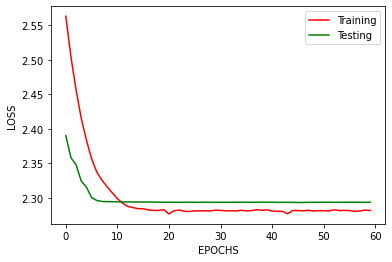

In [0]:
plot_loss(history.history['loss'],history.history['val_loss'])

In [0]:
for key in history.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


In [0]:
#plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [0]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [0]:
best_model=ModelCheckpoint('best_digits_model.hdf5',save_best_only=True)

In [0]:
model=Sequential()
# using 
model.add(Dense(16,input_shape=(64,),activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',  metrics=['accuracy'])

In [0]:
history1=model.fit(X_train,y_train,epochs=10000,validation_data=(X_test,y_test),callbacks=[early_stop,best_model],verbose=0)


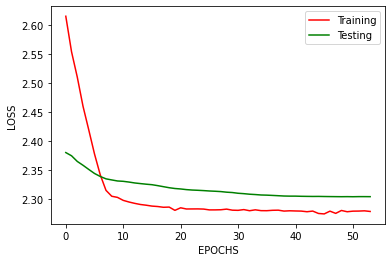

In [0]:
plot_loss(history1.history['loss'],history1.history['val_loss'])

In [0]:
#plot_accuracy(history1.history['accuracy'], history1.history['val_accuracy'])

# **Batch normalizing a this digits model**

In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [0]:
# Import batch normalization from keras layers
from tensorflow.keras.layers import BatchNormalization
# from keras.layers import BatchNormalization not working


In [0]:
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))


In [0]:
# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
early_stop=EarlyStopping(monitor='val_loss',patience=6)

In [0]:
history_batch=batchnorm_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,callbacks=[early_stop])

In [0]:
def compare_history_loss(history_batch,history_nobatch):
  plt.figure()
  plt.plot(history_batch.history['loss'],color='red')
  plt.plot(history_nobatch.history['loss'],color='green')
  plt.legend(['With Batch Norm', 'No Batch Norm'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

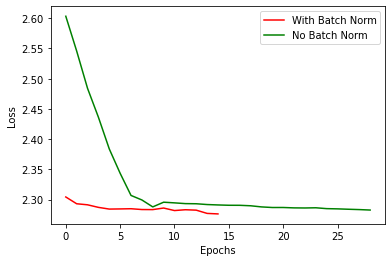

In [0]:
compare_history_loss(history_batch,history1)

In [0]:
def compare_history_accuracy(history_batch,history_nobatch):
  plt.figure()
  plt.plot(history_batch.history['accuracy'],color='red')
  plt.plot(history_nobatch.history['accuracy'],color='green')
  plt.legend(['With Batch Norm', 'No Batch Norm'])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.show()

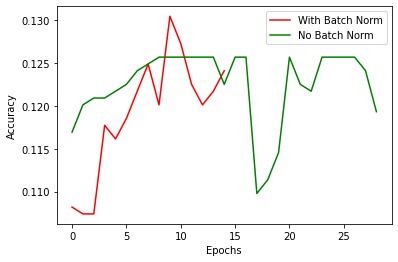

In [0]:
# compare_history_accuracy(history_batch,history1)